![Astrofisica Computacional](../../logo.png)

---
## Archivos `FITS` (Imágenes) II


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Resumen

En este cuaderno utilizaremos `astropy` para leer un archivo .fits y visualizar su contenido como una imágen astronómica.

---

## Archivos FITS de imágenes con diferentes filtros

En esta ocasión se utilizará un conjunto de imágenes FITS de la galaxia M31, obtenida de la SIMBAD Database. Primero vaya al portal

http://cdsportal.u-strasbg.fr/?target=andromeda

En la seción de Tabular Data, ingrese a las pestaña de imágenes y desargue los archivos

m31_sdss_obs_flux_attcorr_nomask_g.fit \
m31_sdss_obs_flux_attcorr_nomask_r.fit \
m31_sdss_obs_flux_attcorr_nomask_u.fit \
m31_sdss_obs_flux_attcorr_nomask_i.fit

que corresponden a imagenes fotométrica con los [filtros](https://en.wikipedia.org/wiki/Photometric_system): *g*, *r*, *u* e *i*. 


---

## 1. Leer la información del archivo .fits

Ahora leeremos la información de los HDU en el archivo, a list-like collecion of HDU (Header Data Unit) objects.

In [1]:
from matplotlib import pyplot as plt
from astropy.io import fits
import numpy as np

with fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit') as hdul:
    hdul.info() 

Filename: data/m31_sdss_obs_flux_attcorr_nomask_r.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      59   (2300, 7400)   float32   


Aqui solo existe un HDU (Primario) con la información fotométrica en un arreglo de tamaño (2300,7400).

El Header nos da la información completa,

In [2]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2300                                                  
NAXIS2  =                 7400                                                  
COMMENT Keywords relevant for current image:                                    
CREATOR = 'Taavi Tuvikene & Elmo Tempel' / Creators of the present image        
COMM2   = 'Image is intrinsic attenuation corrected.'                           
MODELDAT= '08.okt 2010'        / Model creation date                            
DATE_MOD= '2011-02-25 18:58'   / file modification date                         
BUNIT   = 'nanomaggies/px'     / They are 10^9 times the flux: m=22.5-2.5log(f) 
PIX_SIZE=                 3.96 / pixel scale (arcsec)                           
MASKED  = 'false   '        

Ahora leeemos los datos y los asignaremos a un objeto en Python,

In [3]:
hdul = fits.open('data/m31_sdss_obs_flux_attcorr_nomask_r.fit')
image_data = hdul[0].data
hdul.close()

image_data.shape

(7400, 2300)

## 2. Visualizzación de la Imagen

Al visualizar con un mada de color de grices se tiene


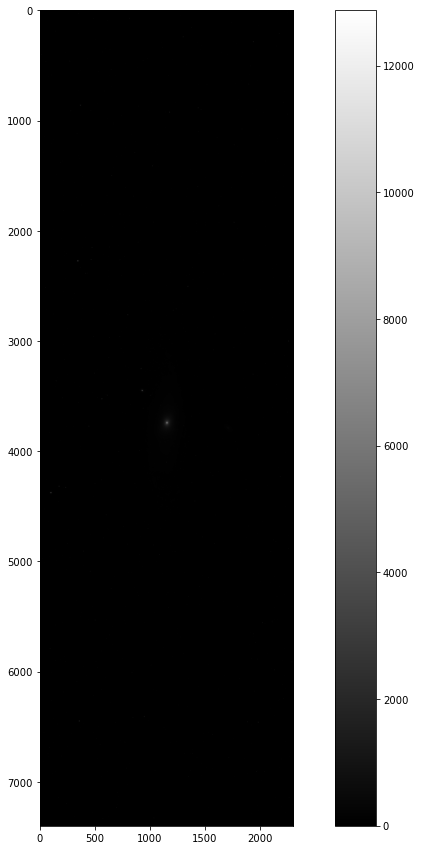

In [4]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()

La imagen esta casi completamente oscura. Cambiando el mapa de color no se obtiene un mejor resultado,

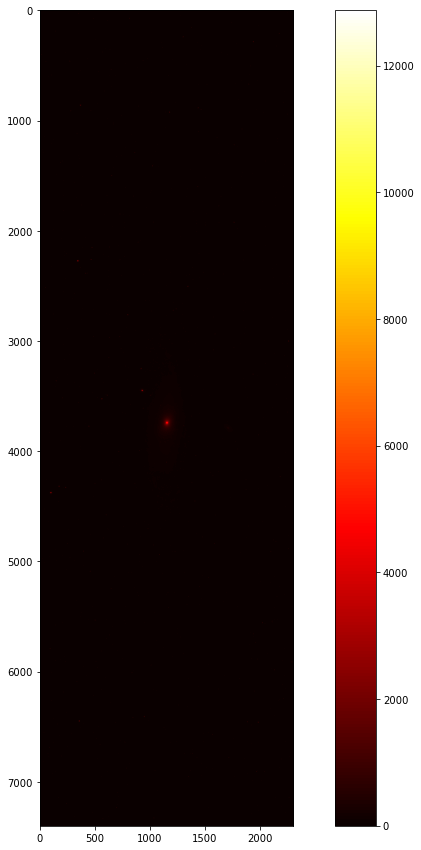

In [5]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='hot')
plt.colorbar()
plt.show()

Estos resultados se deben al gran rango de valores que toman los números dentro del arreglo. Para mejorar la imagen utilizaremos una escala logaritmica,

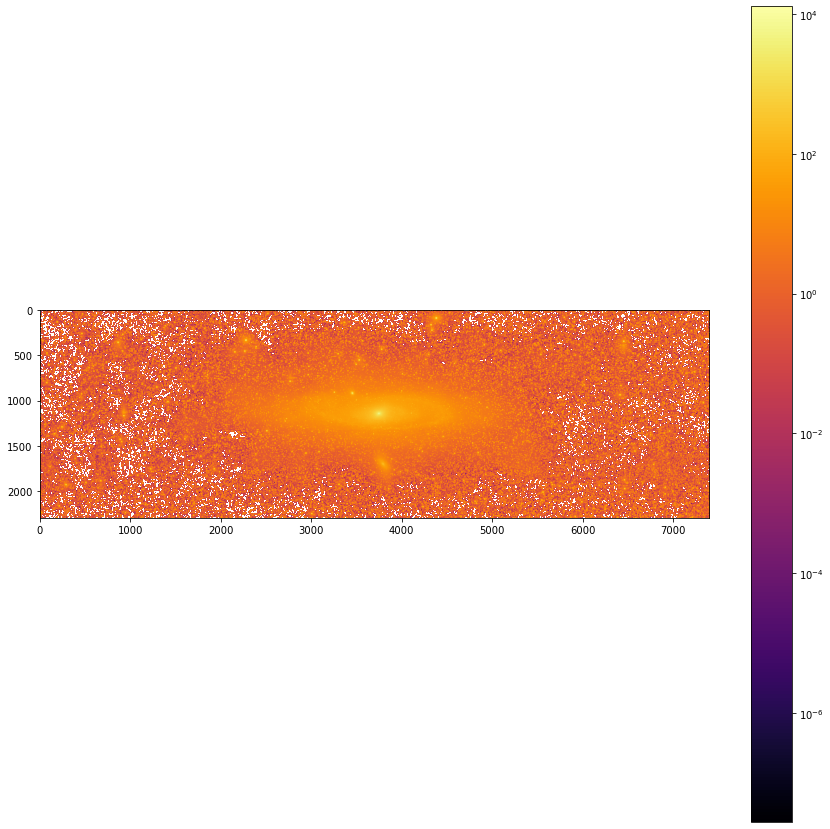

In [8]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(15,15))
plt.imshow(image_data.T, cmap='inferno', norm=LogNorm())
plt.colorbar()
plt.show()

Debido a que al parecer exite mucho ruido, consideremos modificar la imagen utilizando la información del histograma de los datos, 

In [9]:
flat_data = image_data.flatten()
flat_data.shape

(17020000,)

El mínimo y el máximo de estos valores son

In [10]:
np.min(flat_data)

-3.081798

In [11]:
np.max(flat_data)

12873.503

Ahora ealizamos el histograma utilizando una escala logaritmica,

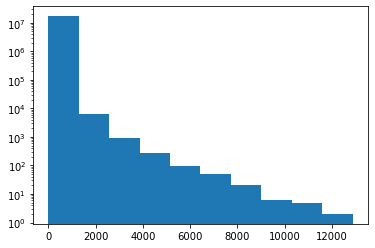

In [12]:
plt.hist(flat_data, bins=10,log=True) 
plt.show()

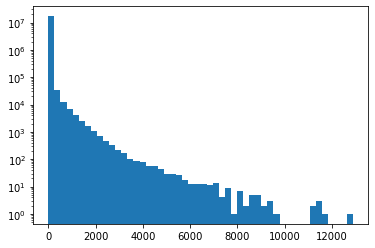

In [13]:
plt.hist(flat_data, bins=50,log=True) 
plt.show()

De esta forma, construiremos la imagen utilizando solamente los valores dentro del rango entre 1 y 1e3.

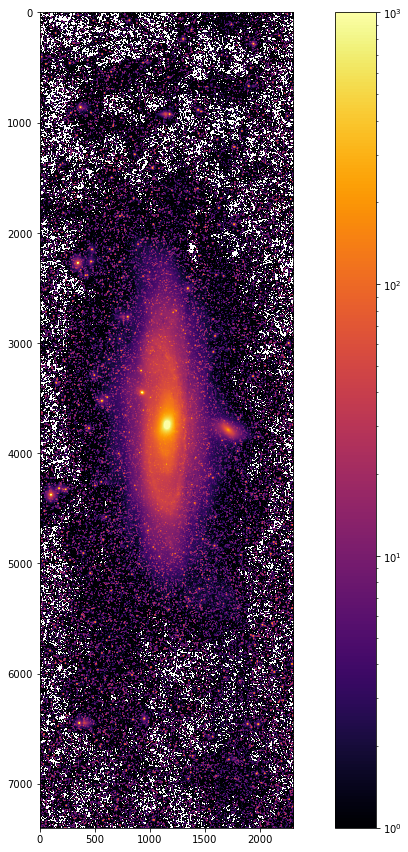

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(image_data, cmap='inferno', norm=LogNorm(vmin=1, vmax=1E3))
plt.colorbar()
plt.show()